**Neden Önişlemeye ihtiyacımız var?**
	
	 • Makine Öğrenim projelerinde uygulanan modelden daha iyi sonuçlar elde etmek için verilerin formatı uygun 
     bir şekilde olmalıdır. Belirtilen bir formatta belirli bir formatta bilgiye ihtiyaç duyulur. Örneğin, Random 
     Forest algoritması boş değerleri desteklemez, bu nedenle Random Forest algoritması yürütmek için boş değerler 
     orijinal ham veri kümesinden yönetilmelidir. 
     

**Hangi önişlemme yöntemleri ve neden yapılır?**

- Açıklayıcı Veri Analizi(Exploratory Data Analysis - EDA)

	EDA, veri analizi sürecinizin ilk adımıdır. Burada, sahip olduğunuz verileri anlamlandırırsınız ve sonra hangi soruları sormak istediğinizi ve bunları nasıl çerçeveleyeceğinizi ve ihtiyacınız olan cevapları almak için mevcut veri kaynaklarınızı en iyi nasıl kullanacağınızı anlarsınız.
    
	Bunu, mevcut verilerinizde kalıplara, trendlere, aykırı değerlere, beklenmedik sonuçlara ve benzerlerine geniş bir bakış açısıyla, bunu anlatan hikayeyi anlamak için görsel ve kantitatif yöntemleri kullanarak yaparsınız. 

    • Verilerin dağılımını inceleme;
    
	• Hataları ve eksik verileri belirleme;
    
	• Verilerin altta yatan yapısını haritalamak;
    
	• En önemli değişkenleri tanımlamak;
    
	• Anomalileri ve aykırı değerleri listeleme;
    
	• Belirli bir modelle ilgili varsayımları / varsayımları test etme;
    
	• Kişiye özgü bir modelin kurulması (verileri minimal tahmin edici değişkenlerle açıklamak için kullanılabilecek bir model);
    
	• Parametrelerin tahmin edilmesi ve ilgili güven aralıklarının veya hata paylarının belirlenmesi.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [13]:
df = pd.read_csv('/Users/nezahatsonmez/Documents/meetUp/2nd/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

    Bu bilgilerden gözlemleyebileceğimiz üzere (Alley ve PoolQC gibi..) bazı parametreler belki de tahmin etmek 
    istediğimiz hedef değişkenle ilgili olmayabilir veya çok fazla NaN değer içerdiği için bizi sonuca 
    götürmeyebilir. Örneğin ID bize bir tahmin değeri katmayacaktır. Veya NaN olmayan değer sayısı %30 dan fazla 
    olmayanlar da aynı şekilde. Bu değişkenleri veriden çıkarmamız gerekir!

In [15]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']

L = []
for c in df.columns:
    if c not in df2.columns:
        L.append(c)
print('\n')
print("List of dropped columns:", L)
df = df2



('List of dropped columns:', ['Id', 'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])


     --------------------------------------------------------------------------------

    Fakat veri setimizden çok ciddi eksiklik olmadıkça veri silmek pek önerilmez. 
    Peki %30 dan fazlası NaN gelmemiş ise ve bu verileri kullanmak istiyor isek bu boşlukları nasıl doldururuz?
    
    
    ---------------------------------------------------------------------------------
    
        - Eksik datalar ile çalışma

	Öncelikle, eksik verilerinizin modelini belirleyin. Üç tür eksik veri var:

		• Missing Completely at Random: Herhangi bir değişkende eksik verilerde herhangi bir model yoktur. Bu umabileceğin en iyisi.
	
		• Missing at Random: Eksik verilerde bir model var, ancak önerme olasılığı birincil bağımlı değişkenlerinizde yok.
	
		• Missing Not at Random: Eksik verilerde birincil bağımlı değişkenlerinizi etkileyen bir desen var. Örneğin, düşük gelirli katılımcıların yanıt verme olasılığı daha düşüktür ve bu nedenle gelir ve olasılık önerme hakkındaki sonuçlarınızı etkilemektedir. 

	Bu sorunu nasıl çözeriz?

		• Liste Bazlı silme : Örneklem çok büyük ise bir kaynakdan gelen eksik veriler ile birlikte o kaynaktan gelen verilerin tamamı silinebilir. Bu yalnızca verimiz yeterince büyük olduğunda uygulaybileceğimiz bir yöntemdir.

		• Verileri kurtarma : Kullanıcılara ulaşıp eksik önemli verileri doldurmaları istenebilir.

		Imputation:

		• Educated Guessing: Doldurma yöntemi olarak verinin geldiği kaynaktan bugüne kadar en çok gelme ihtimali olan değer ile doldurulabilir. Çok tercih edilen bir yöntem olmasada, eksik değer doldurulabilir. 

		• Average Imputation: Doldurma yöntemi olarak verinin geldiği kaynaktan bugüne kadar gelen veri setimizde bulunan verilerin ortalaması ile doldurulabilir. Bu seçenek her zaman tavsiye edilmez çünkü verilerinizin değişkenliğini yapay olarak azaltabilir, ancak bazı durumlarda anlamlıdır.

		• Common-Point Imputation: Bir derecelendirme ölçeği için, orta noktayı veya en çok seçilen değeri kullanın. Örneğin, beş noktalı bir ölçekte, 3, orta nokta veya 4, en yaygın değeri (çoğu durumda) yerine. Bu tahmin etmekten biraz daha yapılandırılmış, ancak yine de daha riskli seçenekler arasında. İkame değerinin kullanılmasını desteklemek için iyi bir nedeniniz ve verileriniz yoksa dikkatli olun.

		• Regression Substitution: Eksik bir değeri tahmin etmek için çoklu regresyon analizini kullanabilirsiniz. Regresyon ikamesi, eksik değerleri diğer değerlerden tahmin eder. 

		• Multiple Imputation: En sofistike ve şu anda en popüler yaklaşım regresyon fikrini daha da ileri götürmek ve yanıtlar arasındaki korelasyonlardan yararlanmaktır. Çoklu denemede, yazılım eksik veriler için korelasyonlara dayanan makul değerler yaratır ve daha sonra tahminlerinize rastgele hatalar ekleyerek simüle edilmiş veri kümelerini değerlendirir. 


    
    

In [1]:
#Bu boşluları doldurma konusunda birkaç örnek verecek olursak..
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
dfMissing = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
dfMissing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [2]:
#Bütün eksik veri gelen satırları silmek istersek..
df_no_missing = dfMissing.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [3]:
#Sadece bütün değerleri eksik gelen satırları silmek istersek..
df_cleaned = dfMissing.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [4]:
#Tüm Satırları eksik değerler içeren bir sutün oluşturalım..
dfMissing['location'] = np.nan
dfMissing

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [5]:
#Şimdide tüm değerleri eksik gelen sutunun tamamını silelim
# Bu bozuk bir sensör olabilir veya hiç veri girilmemiş ve tanımlanmış bir opsiyonel bir alan olabilir..
dfMissing.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


    Ya o boşlukları doldurmak istersek

In [7]:
#Sıfırla doldurmak istediğimiz zaman
dfMissing.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [8]:
#Average Imputation --> Yani eksik veri gelen kısımları o parametrenin ortalaması ile doldurmaktır.
dfMissing["preTestScore"].fillna(dfMissing["preTestScore"].mean(), inplace=True)
dfMissing

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [9]:
#Bazı durumlarda direk parametrenin ortalaması ile doldurmak pek doğru bir veri elde etmemizi sağlamaz, 
#bu durumlardan bir tanesi verinin gruplar bazında dağıldığı durumlardır
#bu örnekde veriyi "Cinsiyet" gruplarına göre ayırıp, her gurubun parametresini kendi içerisinde ortalaması ile dolduruyoruz.
dfMissing["postTestScore"].fillna(dfMissing.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
dfMissing

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [10]:
#Son örnek olarak, örneğin arka arkaya gözlem değerleri çok yakın gelen durumlar için (Sensör güzel bir örnek olabilir)
#eksik değerleri bir önceki veya bir sonraki değer ile doldurabiliriz.
dfMissing.fillna(method='pad', limit=1)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,Jason,Miller,42.0,m,3.0,25.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


   **Now lets take a look at how the housing price is distributed**


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


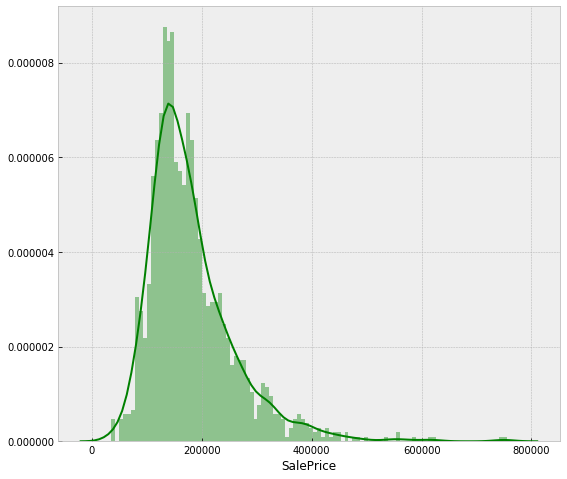

In [16]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

    Bu grafik sayesinde ev fiyatlarının sağ çarpık olduğunu rahatça gözlemleyebiliriz.
    Machine Learning algoritması gibi bir algoritma kullanmadan çarpıklıkdan ve aykırı değerlerden kurtulmalıyız.

In [17]:
#For this part lets look at the distribution of all of the features by ploting them
#To do so lets first list all the types of our data from our dataset and take only the numerical ones:

list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


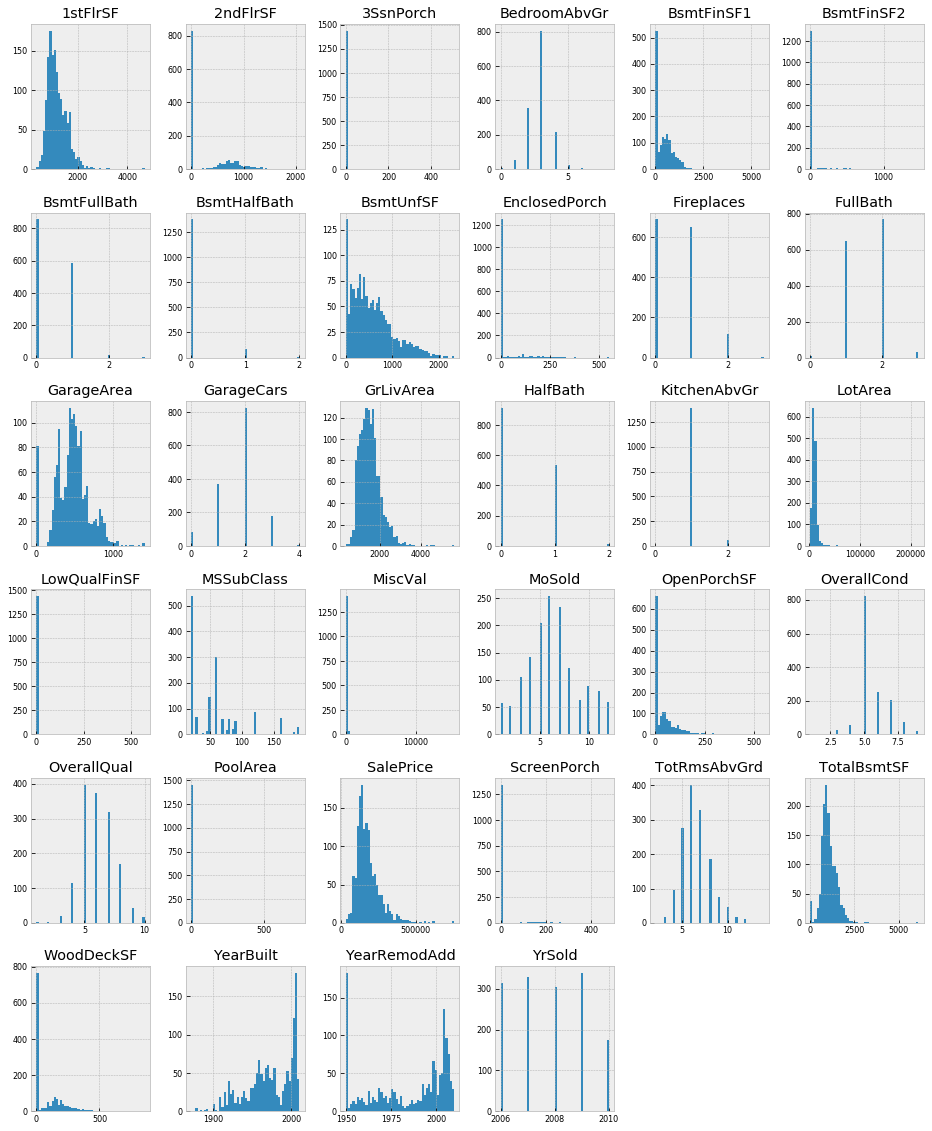

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [49]:
#Now we'll try to find which features are strongly correlated with SalePrice. 
#We'll store them in a var called golden_features_list. 
#We'll reuse our df_num dataset to do so.

In [50]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


    Numeric parametrelerin grafiğini çizip hangilerinin aykırı değerlere sahip olduğuna bakalım
    Ve bu aykırı değerleri çıkardıktan sonra hangi değişkenlerin hedef değişkenimiz ile güçlü korelasyon içersinde olduklarına bakalım.
    
    Aynı zamanda nümerik olan verileri normalize etmemiz de gerekmektedir. Veriler birçok farklı skalada gelebilir.Bu skala farklılıklarının sonucu yanlı etkilemesini önlemek için normalize veya standardize etme gibi yöntemler burada önemli bir rol oynar. 

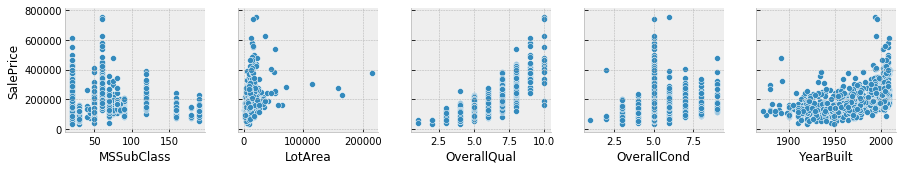

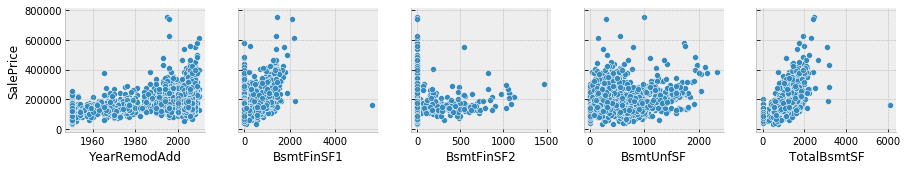

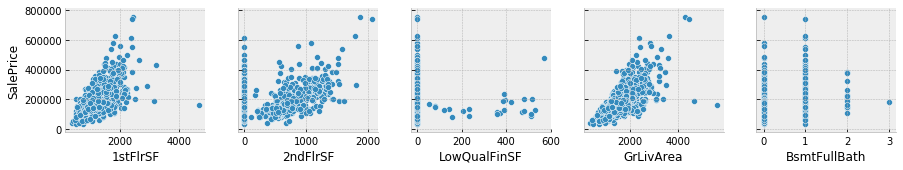

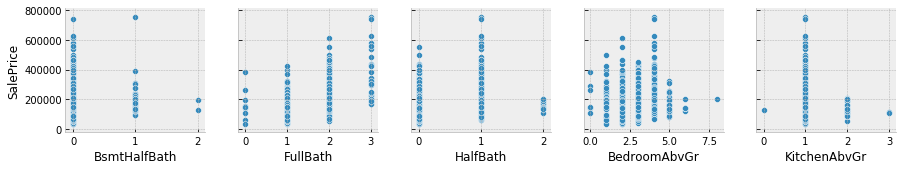

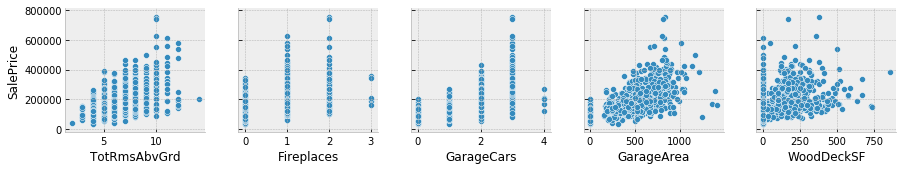

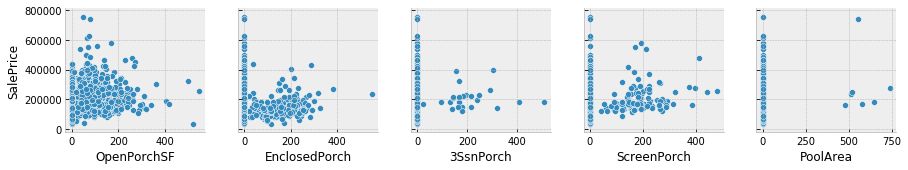

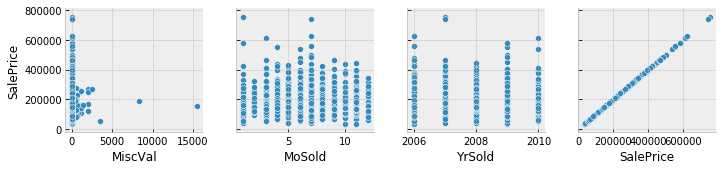

In [51]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [52]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.139200692178
       HalfBath: -0.0843917112718
     MSSubClass: -0.0842841351266
    OverallCond: -0.0778558940487
         YrSold: -0.0289225851687
   BsmtHalfBath: -0.0288345671855
       PoolArea: -0.0140915215064
   BsmtFullBath: 0.0114391633404
         MoSold: 0.0464322452238
      3SsnPorch: 0.0639324325689
    OpenPorchSF: 0.0864529885715
        MiscVal:  0.088963389173
     Fireplaces:  0.121660584214
      BsmtUnfSF:  0.169261000495
   BedroomAbvGr:  0.180936693108
     WoodDeckSF:  0.193706012375
     BsmtFinSF2:  0.198956094308
  EnclosedPorch:  0.241278836301
    ScreenPorch:  0.255430079549
        LotArea:  0.263843353871
   LowQualFinSF:  0.300075016555
     BsmtFinSF1:  0.471690426524
   YearRemodAdd:  0.507100967111
      YearBuilt:  0.522897332879
   TotRmsAbvGrd:  0.533723155582
       FullBath:  0.574562673776
       1stFlrSF:  0.605852184692
     GarageArea:  0.608405282917
    TotalBsmtSF:  0.609680818807
     GarageCars:  0.637095406208
    

In [53]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


 **NORMALIZATION**

In [19]:
# Import required modules
import pandas as pd
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline


In [20]:
# Create an example dataframe with a column of unnormalized data
data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
dfNor = pd.DataFrame(data)
dfNor

,score
0,234
1,24
2,14
3,27
4,-74
5,46
6,73
7,-18
8,59
9,160


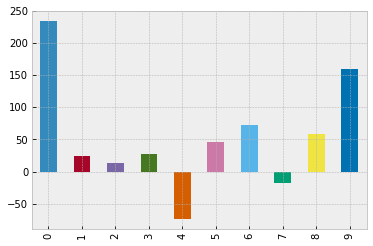

In [21]:
# View the unnormalized data
dfNor['score'].plot(kind='bar')

In [22]:
# Create x, where x the 'scores' column's values as floats
x = dfNor[['score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

          0
0  1.000000
1  0.318182
2  0.285714
3  0.327922
4  0.000000
5  0.389610
6  0.477273
7  0.181818
8  0.431818
9  0.759740


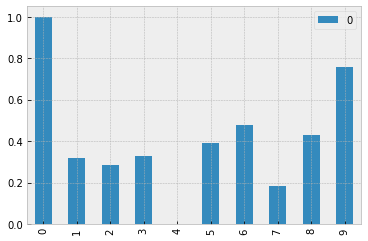

In [23]:
# View the dataframe
print(df_normalized)
# Plot the dataframe
df_normalized.plot(kind='bar')

    Categorical Variables

In [26]:
df= pd.read_excel('/Users/nezahatsonmez/Documents/meetUp/2nd/BD_VERTEIL_ISLER_1386028.xlsx')

In [27]:
df["RenkDesen"]=df['RENK_KOD'].map(str)+['-']+df['DESEN_KOD'].map(str)
df = df.drop(['RENK_KOD','DESEN_KOD'],axis=1)
df['RenkDesen'] = df['RenkDesen'].astype('category')
cat_df = df.select_dtypes(include=['category']).copy()
cat_df.head()

,RenkDesen
0,10-U
1,61-U
2,419-U
3,461-U
4,10-U


In [28]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [29]:
lbl_enc = MultiColumnLabelEncoder()
lbl_enc.fit(cat_df)
xtrain_lbl = lbl_enc.transform(cat_df)
xtrain_lbl.head(5)
Xtrain_lbl = xtrain_lbl.values
x_dum = pd.get_dummies(xtrain_lbl, columns= xtrain_lbl.columns)
x_dum.head(5)

,RenkDesen_0,RenkDesen_1,RenkDesen_2,RenkDesen_3
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


    Working with the time stamp

In [34]:
raw_data = {'time_stamp': ['2017-07-04 11:00:00', '2017-07-05 03:00:00','2017-07-06 04:00:00', '2017-07-07 05:00:00']}
dfDate = pd.DataFrame(raw_data, columns = ['time_stamp'])
dfDate


,time_stamp
0,2017-07-04 11:00:00
1,2017-07-05 03:00:00
2,2017-07-06 04:00:00
3,2017-07-07 05:00:00


In [35]:
dfDate['time_stamp'] = pd.to_datetime(dfDate['time_stamp'])

In [36]:
dfDate['hours'] = dfDate['time_stamp'].dt.hour
dfDate

,time_stamp,hours
0,2017-07-04 11:00:00,11
1,2017-07-05 03:00:00,3
2,2017-07-06 04:00:00,4
3,2017-07-07 05:00:00,5


In [37]:
dfDate['DayOfTheWeek'] = dfDate['time_stamp'].dt.dayofweek
dfDate

,time_stamp,hours,DayOfTheWeek
0,2017-07-04 11:00:00,11,1
1,2017-07-05 03:00:00,3,2
2,2017-07-06 04:00:00,4,3
3,2017-07-07 05:00:00,5,4


  **BENİ DİNLEDİĞİNİZ İÇİN TEŞEKKÜRLER**